# 📍Softmax Regression
'모두를 위한 딥러닝2'의 'Lab06 Softmax Classification'을 듣고 정리한 코드입니다.
  
* 강의 링크: https://www.youtube.com/watch?v=HgPWRqtg254&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=9
* 블로그 링크: https://gaga.tistory.com/209

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [32]:
# for reproducibility
torch.manual_seed(1)

## Discrete Probability Distribution
#### 이산 확률 분포 (Discrete Probability Distribution)
확률 변수가 가질 수 있는 값들이 셀 수 있는 경우 그 확률 변수의 분포

#### 연속 확률 분포 (Continuous Probability Distribution)
확률 변수가 가질 수 있는 값들이 셀 수 없는 경우, 즉 어떤 범위에 속하는 모든 실수인 경우 그 확률 변수의 분포
  
위와 같은 이산 확률 분포에서 주사위를 던졌을 때 6이 나올 확률은 1/6 로 확률이 존재하지만, 연속 확률 분포에서 한 점에서의 확률은 존재하지 않는다. Softmax는 이산 확률 분포를 따른다.

## 1. Softmax
softmaax function는 각 클래스에 대한 확률을 추정하여 확률의 총합이 1이 되도록한다. 말 그대로 max 값을 soft하게 뽑아준다. 예를 들어, max=(0,0,1) 와 같은 방식이 아니라, tensor([0.0900, 0.2447, 0.6652]) 와 같은 방식으로 max의 값을 뽑아준다.
  
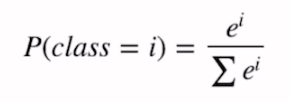
  
convert numbers to probabilities with softmax

### Cross Entropy
P(x)와 Q(x)라는 두 개의 확률분포가 얼마나 비슷한지를 나타내는 수치이다. 이 Cross Entropy를 최소화 하는 것이 중요한데, Q가 P에 가까워져 오차가 줄어들기 때문이다.
  
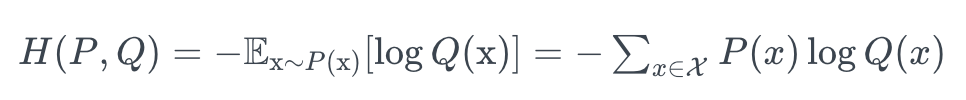
  
위 수식은 확률분포 P에서 sampling한 x를 Q에 넣어 log를 취한 것의 평균에 음수를 취한 것이다. 이 수식은 아래의 수식으로도 표현할 수 있다.
  
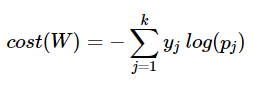
  
1개의 데이터에 대한 비용 함수이다.  
* y: 실제값
* k: 클래스의 개수
* y(j): 실제값 원-핫 벡터의 j번째 인덱스
* p(j): 샘플 데이터가 j번째 클래스일 확률
  
  
최종 비용 함수는 다음과 같다.
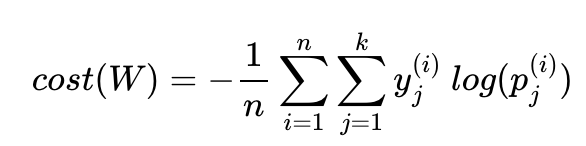

### Softmax Cost Function Implement

### 1) Cross Entropy Loss (Low-level)
For multi-class classification, we use the cross entropy loss.  
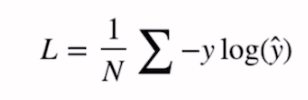
  
where ^y is the predicted probability and y is the correct probability (0 or 1).

* torch.rand(): 0과 1 사이의 숫자를 균등하게 생성

In [33]:
z = torch.rand(3, 5, requires_grad=True)
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [34]:
hypothesis.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)

* torch.randint(num, size): 주어진 범위 내의 정수를 균등하게 생성. 자료형은 float32

torch.randint(low=0, high, size, *, generator=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor

In [35]:
y = torch.randint(5, (3,)).long()
print(y) # one-hot vector의 index 값

tensor([0, 2, 1])


In [36]:
y_one_hot = torch.zeros_like(hypothesis) # |y_one_hot| = (3, 5)

In [37]:
y_one_hot

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

tensor.scatter_(dim, index, src, reduce=None) -> Tensor
파라미터로 주어진 index에 맞게 src의 값을 새로운 tensor로 할당한다.

In [39]:
y.unsqueeze(1)

tensor([[0],
        [2],
        [1]])

In [38]:
y_one_hot.scatter_(1, y.unsqueeze(1), 1) # |y| = (3,) -> (3, 1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

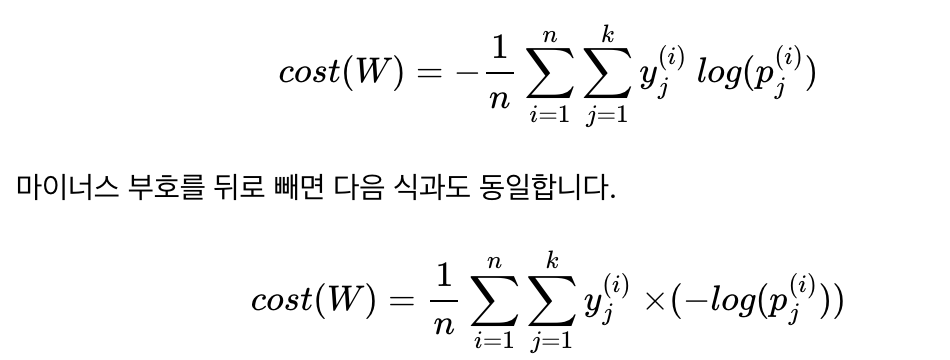

In [40]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


### 2) Cross Entropy Loss (High-Level)
PyTorch에서 cross entropy loss를 구하는 방법은 다음과 같다.  
  

* y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
* y_one_hot * -torch.log(F.softamax(z, dim=1)).sum(dim=1).mean()
* y_one_hot * -F.log_softmax(z, dim=1)).sum(dim=1).mean()
* F.nll_loss(F.log_softmax(z, dim=1), y)
* F.cross_entropy(z, y)

#### (1) F.softmax() + torch.log() = F.log_softamx()

In [41]:
# Low level
torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

In [43]:
# High level
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

#### (2) F.log_softmax() + F.nll_loss() = F.cross_entropy()

In [42]:
# Low level
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

torch.log(F.softmax(z, dim=1))를 방금 배운 F.log_softmax()로 대체할 수 있다.

In [44]:
# High level
(y_one_hot * -F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

이를 더 간단하게 하면 다음과 같다.  
F.nll_loss()를 사용하면 원-핫 벡터는 필요로 하지 않으며 바로 실제값을 인자로 사용한다.
* NLL = Negative Log Likelihood

In [45]:
# High level
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

#### (3) F.cross_entropy()
F.cross_entropy는 비용 함수에 소프트맥스 함수까지 포함하고 있음을 기억해야 한다.

PyTorch also has F.cross_entropy that combines F.log_softmax() and F.nll_loss().

In [11]:
F.cross_entropy(z, y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

## 2. Implementation

In [12]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0] # 1이 있는 위치의 인덱스 값
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

### (1) Training with Low-level Cross Entropy Loss

In [18]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    # H(x)
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) # or .mm or @
    y_one_hot = torch.zeros_like(hypothesis)
    y_one_hot.scatter(1, y_train.unsqueeze(1), 1)
    
    # cost 계산
    cost = (y_one_hot * -torch.log(F.softmax(hypothesis, dim=1))).sum(dim=1).mean()
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Cost: {:.6f}".format(
            epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 0.000000
Epoch  100/1000 Cost: 0.000000
Epoch  200/1000 Cost: 0.000000
Epoch  300/1000 Cost: 0.000000
Epoch  400/1000 Cost: 0.000000
Epoch  500/1000 Cost: 0.000000
Epoch  600/1000 Cost: 0.000000
Epoch  700/1000 Cost: 0.000000
Epoch  800/1000 Cost: 0.000000
Epoch  900/1000 Cost: 0.000000
Epoch 1000/1000 Cost: 0.000000


### (2) Training with F.cross_entropy
one-hot encoding 과정이 생략된다.

In [49]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    # cost 계산
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Cost: {:.6f}".format(
            epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399963


### (3) High-level Implementation with nn.Module

In [46]:
model = nn.Linear(4, 3)

In [47]:
# optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [48]:
nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    # H(x)
    prediction = model(x_train)
    
    # cost
    cost = F.cross_entropy(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Cost: {:.6f}".format(
            epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 1.849513
Epoch  100/1000 Cost: 0.689894
Epoch  200/1000 Cost: 0.609258
Epoch  300/1000 Cost: 0.551218
Epoch  400/1000 Cost: 0.500141
Epoch  500/1000 Cost: 0.451947
Epoch  600/1000 Cost: 0.405051
Epoch  700/1000 Cost: 0.358733
Epoch  800/1000 Cost: 0.312912
Epoch  900/1000 Cost: 0.269522
Epoch 1000/1000 Cost: 0.241921


### (4) High-level Implementation with Class

In [20]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3) # output이 3!
        
    def forward(self, x):
        return self.linear(x) # |x| = (m, 4) -> (m, 3)

In [21]:
model = SoftmaxClassifierModel()

|x_train| = (m, 4)
|prediction| = (m, 3)
|y_train| = (m,)

Logistic Regression과 매우 유사하다.

In [22]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    # H(x) 계산
    prediction = model(x_train) # |x_train| = (m, 4), |prediction| = (m, 3)
    
    # cost 계산
    cost = F.cross_entropy(prediction, y_train) # |y_train| = (m,)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Cost: {:.6f}".format(
            epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 1.849513
Epoch  100/1000 Cost: 0.689894
Epoch  200/1000 Cost: 0.609258
Epoch  300/1000 Cost: 0.551218
Epoch  400/1000 Cost: 0.500141
Epoch  500/1000 Cost: 0.451947
Epoch  600/1000 Cost: 0.405051
Epoch  700/1000 Cost: 0.358733
Epoch  800/1000 Cost: 0.312912
Epoch  900/1000 Cost: 0.269522
Epoch 1000/1000 Cost: 0.241921


* multi classification을 하기 위해서는 cross entropy나 softmax layer를 쓰게 된다.
* binary classification은 Logistic Regression에서 사용한 loss function, 즉 binary cross entropy, sigmoid를 사용하는 것이 많다.
